# 데이터셋 불러오기

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'N', 'LSTAT', 'PRICE']
housing = pd.read_csv('/content/drive/MyDrive/ML&DM/Machine_Learning/ML_Assignment6_2017310695_이주민/housing.csv', header=None, delimiter=r"\s+", names=column_names)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0



# Feature 설명
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per dollar 10,000.
- PTRATIO : pupil-teacher ratio by town
- N : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population
- PRICE : Median value of owner-occupied homes in $1000's

# Feature 특징

In [140]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Feature 분포

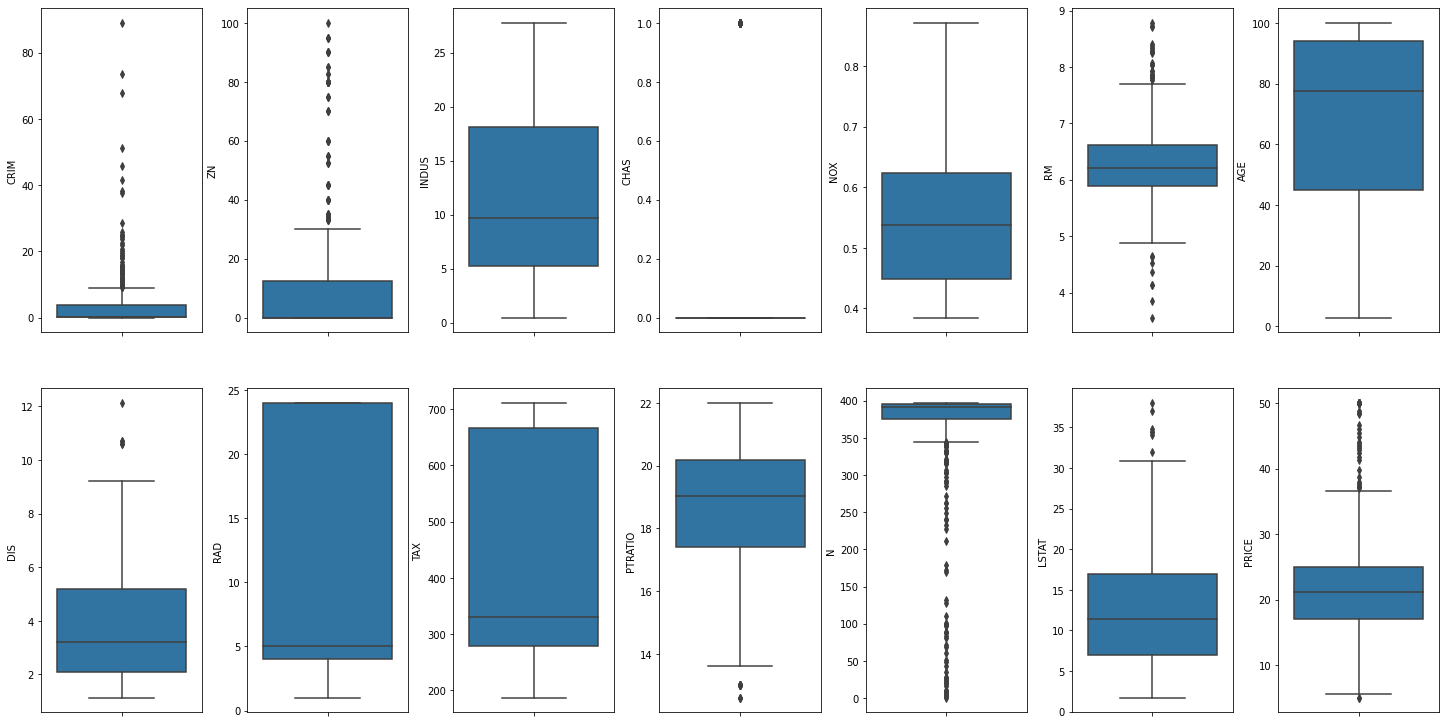

In [141]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for key, value in housing.items():
    sns.boxplot(y = value, ax = axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Outlier 제거

In [142]:
for k, v in housing.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(housing)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column N outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


# 가장 MAX 값인 50 PRICE 제거

In [143]:
housing = housing[~(housing['PRICE'] == 50)]
print(np.shape(housing))

(490, 14)


# 전처리한 Data 분포

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

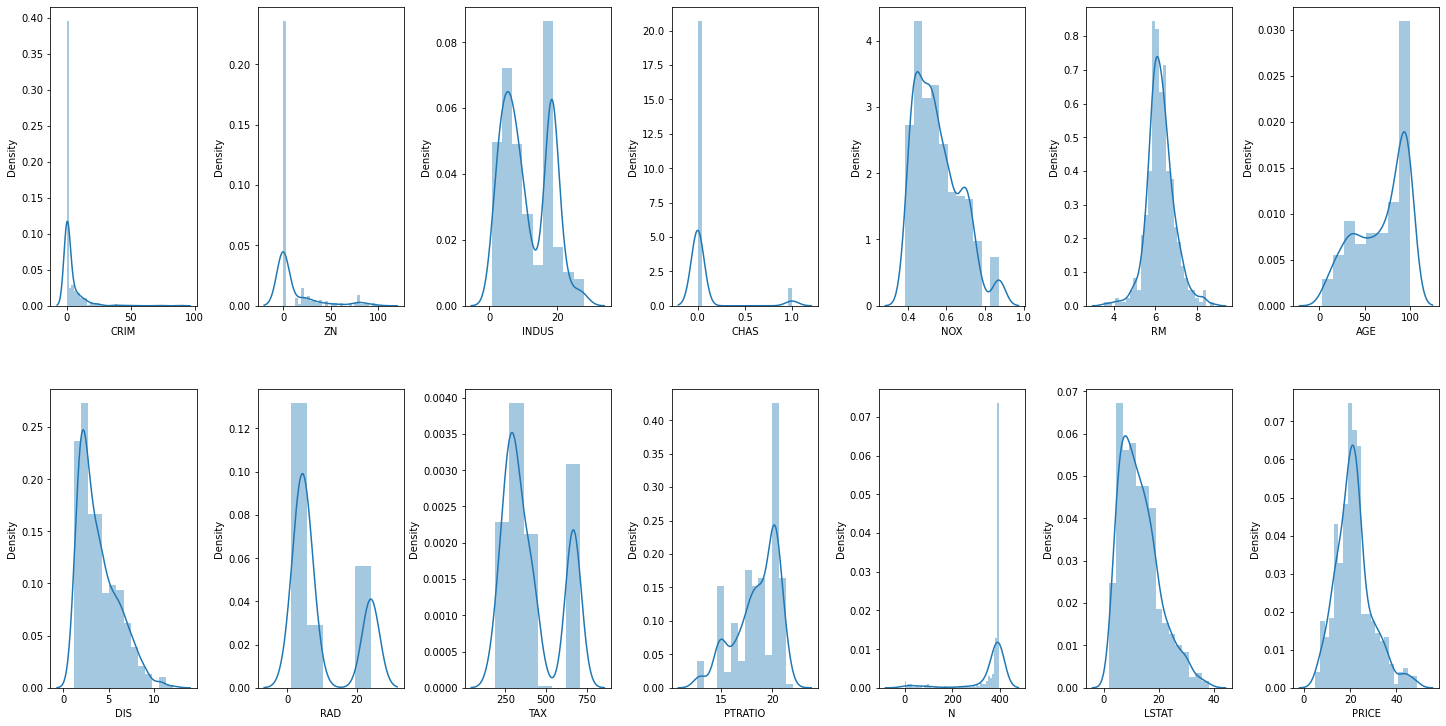

In [144]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Data 상관관계
- correlation이 0에 가까운 CHAS는 regression 예측에 사용하지 않음
- CRIM, ZN, N, RAD와 같이 Skewness가 높은 regression 예측에 사용하지 않음
- 양의 상관관계 : RM, DIS
- 음의 상관관계 : LSTAT, INDUS, TAX, AGE, NOX, PTRAIO

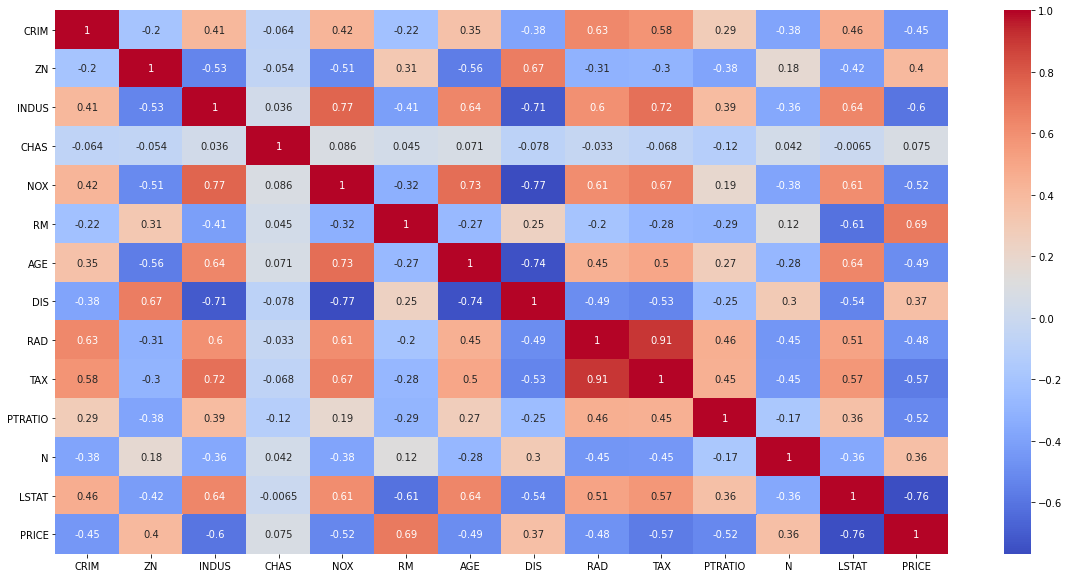

In [145]:
plt.figure(figsize=(20, 10))
sns.heatmap(housing.corr(), cmap='coolwarm', annot=True)

In [157]:
housing.corr()[['PRICE']].sort_values(by='PRICE', ascending=False)

,PRICE
PRICE,1.000000
RM,0.686634
ZN,0.404608
DIS,0.368813
N,0.364928
CHAS,0.074803
CRIM,-0.450115
RAD,-0.476296
AGE,-0.492915
PTRATIO,-0.518641


# 양/음의 상관관계 데이터 그래프 

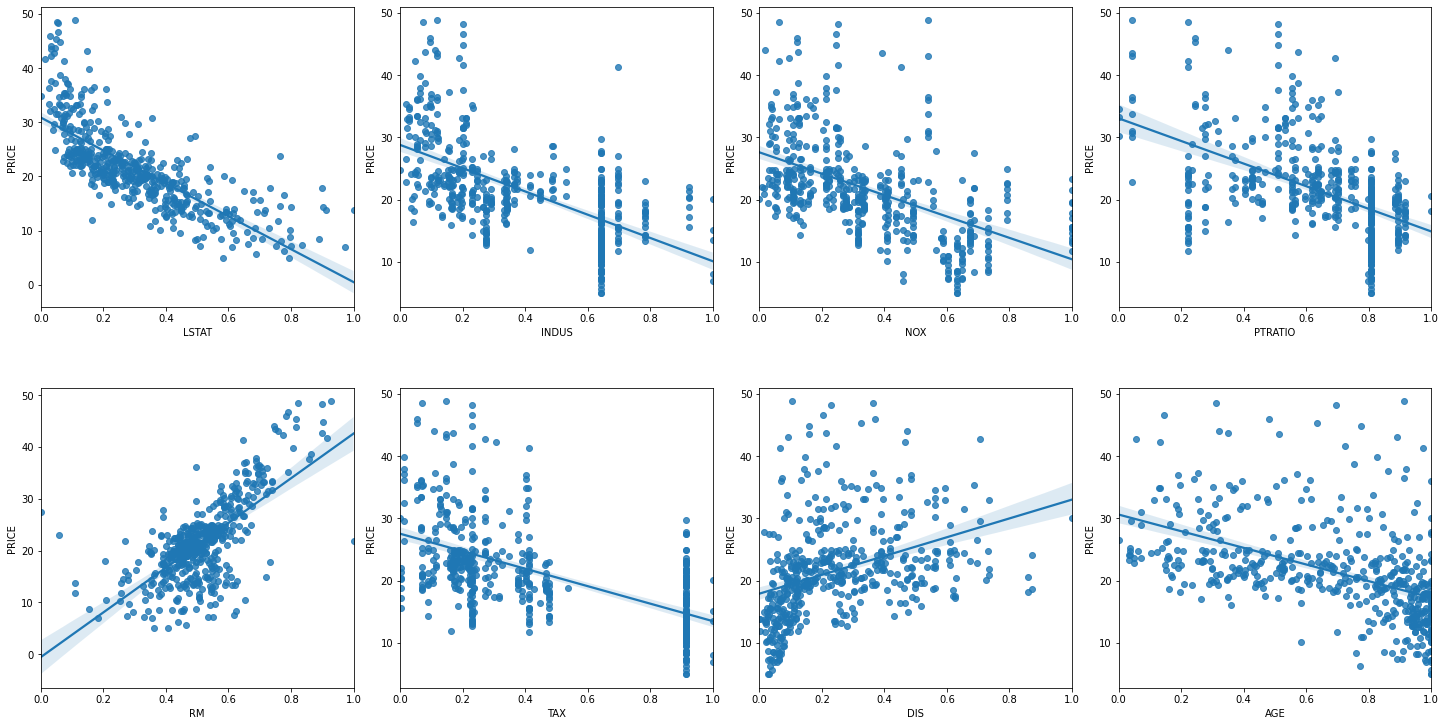

In [147]:
#in the matrix above it is seemed that TAX and RAD coloumns are highly correlated but LSTAT,INDUS,RM,TAX,NOX,PTRAIO columns have low correlation.
from sklearn.preprocessing import MinMaxScaler

# Let's scale the columns before plotting them against MEDV
min_max_scaler = MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = housing.loc[:,column_sels]
y = housing['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# log 변환
- skewness가 높은 x 데이터에 대해서는 skewness를 줄여주기 위해서 log변환을 함
- 타겟값의 경우에는 주로 로그 변환을 적용한다. 그 이유는 결정값을 정규분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타겟값으로 복원하기가 어려울 수 있으며 또한 왜곡된 분포도 형태의 타겟값을 로그 변환하여 예측 성능이 향상된 경우가 많은 사례로 검증되어있기 때문에 타겟값의 경우는 로그 변환을 적용

In [154]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# train / test set 분류 및 Scaling

In [149]:
from sklearn.model_selection import train_test_split

train_test_split(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 20)
scaler = MinMaxScaler((-1,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression 모델 적용 
- train / test 결과 

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
lr = LinearRegression() 
model = lr.fit(x_train,y_train)
scores = cross_val_score(model,x_train, y_train, cv = 5) 
print("training data - cross validation accuracy : ", scores)
Y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print("test data accuaracy : ", accuracy)

training data - cross validation accuracy :  [0.7322654  0.70294957 0.67413491 0.79628878 0.79541973]
test data accuaracy :  0.7153117990955382


# Test data에 대한 실제값과 예측값 그래프

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

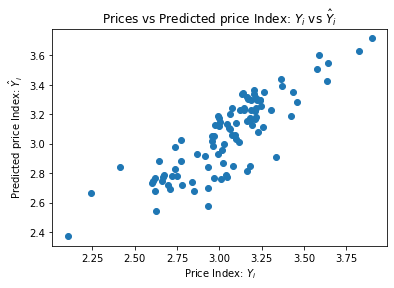

In [156]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")